In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import necessary libraries
import sys
from pathlib import Path
# Ensure the src directory is accessible
sys.path.append('./src')

# Get data

In [2]:
from tdc.single_pred import Tox
karim_data = Tox(name='hERG_Karim')
data_split = karim_data.get_split(method='scaffold', seed=42)
print(f"There are {data_split['train']} training samples, {data_split['valid']} validation samples, and {data_split['test']} test samples.")

Found local copy...
Loading...
Done!
100%|██████████| 13445/13445 [00:05<00:00, 2390.96it/s]


There are       Drug_ID                                               Drug  Y
0        8640  O=C1NCCN1CC[N+]1CCC(c2cn(C3CCCCC3)c3ccc(Cl)cc2...  0
1       11377  O=C(Cc1ccc(-n2cnnn2)cc1)N1CCN(CCc2ccc3nonc3c2)CC1  1
2        1461  NC(=O)c1ncc(N[C@@H]2CCCC[C@@H]2N)cc1Nc1cccc(C(...  1
3        6646  Cc1cc(C)nc(Nc2cc(N[C@@H]3CCCC[C@@H]3N)cnc2C(N)...  1
4         379  COc1cc(C)nc(Nc2cc(N[C@@H]3CCCC[C@@H]3N)cnc2C(N...  1
...       ...                                                ... ..
9406     5238  CC(C)(C)c1cc(NC(=O)n2ccc3cc(Oc4ncnc5c4CCNC5)cc...  1
9407     6201  Cc1ccc2c(C3CCN(CCc4c(C)ccc5c4ccc(=O)n5C)CC3)cc...  1
9408    11725  CCOC(=O)C1=C(CN2CCOCC2)NC(c2nccs2)=NC1c1ccc(F)...  1
9409    12714  CCCCCCOC(=O)NC(=N)c1ccc(NCc2nc3cc(C(=O)N(CCC(=...  1
9410    13134  Cn1c(CNc2ccc(C(=N)N)cc2)nc2cc(C(=O)N(CCC(=O)O)...  0

[9411 rows x 3 columns] training samples,       Drug_ID                                               Drug  Y
0         536        O=C(c1ccccc1C(F)(F)F)N(CC1CCCC1)[C@H]1CCNC

# check data

In [3]:
data_split['train'].head(10)

,Drug_ID,Drug,Y
0,8640,O=C1NCCN1CC[N+]1CCC(c2cn(C3CCCCC3)c3ccc(Cl)cc2...,0
1,11377,O=C(Cc1ccc(-n2cnnn2)cc1)N1CCN(CCc2ccc3nonc3c2)CC1,1
2,1461,NC(=O)c1ncc(N[C@@H]2CCCC[C@@H]2N)cc1Nc1cccc(C(...,1
3,6646,Cc1cc(C)nc(Nc2cc(N[C@@H]3CCCC[C@@H]3N)cnc2C(N)...,1
4,379,COc1cc(C)nc(Nc2cc(N[C@@H]3CCCC[C@@H]3N)cnc2C(N...,1
5,10556,Cc1cc(CC(C)(C)O)cc(Nc2cc(N[C@@H]3CCCC[C@@H]3N)...,1
6,4542,Cc1cc(C(C)(C)O)cc(Nc2cc(N[C@@H]3CCCC[C@@H]3N)c...,1
7,9102,Cc1cccnc1CN1CCC2(CC1)C(=O)N(c1ccc(-c3ccc4scnc4...,1
8,4564,O=S1(=O)CCC(COc2ccc3c(c2)CCC2(CCN(C4CCC4)CC2)O...,0
9,12933,N#C[C@@H]1C[C@@H]2C[C@@H]2N1C(=O)[C@@H](N)C12C...,0


In [4]:
data_split['test'].head(10)

,Drug_ID,Drug,Y
0,7417,CC(C)c1noc(-c2nnc3n2CCN(C(=O)c2ccc(F)cc2)[C@@H...,1
1,3967,CCc1noc(-c2nnc3n2CCN(C(=O)c2ccc(F)cc2)[C@@H]3C)n1,0
2,13387,CC(C)(C)Cn1c(N)nc2ccc(-c3nc(C(C)(C)C)[nH]c3-c3...,0
3,10258,CC(C)(C)C1CCC2(CC1)CCN(c1ccc(OC(F)(F)F)cc1)C(=...,1
4,5612,CCN(CC)c1ccc2cc(C(=O)NCCCCN3CCC(Nc4nc5ccccc5n4...,1
5,6520,CN1CCC(COCc2cc(C(F)(F)F)cc(N3CCCC3)n2)(c2ccccc...,1
6,8954,CN1CCC(COCc2cc(C(F)(F)F)cc(N3CCC(C#N)C3)n2)(c2...,1
7,2983,FC(F)(F)c1cc(COCC2(c3ccccc3)CCNCC2)nc(N2CCCC2)c1,1
8,12756,OC1CCC(Nc2ncc3nc(Nc4c(F)cc(F)cc4F)n([C@@H]4CCO...,0
9,8043,O=C(N[C@@H]1C2CCN(CC2)[C@H]1Cc1cccnc1)c1cc2ccc...,0


# Extract features from SMILES strings

In [5]:
from features import smiles_to_fp

def prepare_data(df, num_features=1024):
    df['features'] = df['Drug'].apply(lambda x: smiles_to_fp(x, num_bits=num_features))
    X = list(df['features'])
    y = df['Y'].values
    return X, y


# Prepare traing and test data

In [6]:
num_features = 128
X_train, y_train = prepare_data(data_split['train'], num_features=num_features)
X_valid, y_valid = prepare_data(data_split['valid'], num_features=num_features)
X_test, y_test = prepare_data(data_split['test'], num_features=num_features)

# Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

# Evaluation on validation data

In [8]:
from evaluate import eval
y_pred = rf_model.predict(X_valid)
result = eval(y_valid, y_pred, verbose=True)

Accuracy: 0.7202380952380952
ROC AUC Score: 0.7234303379170663
Precision: 0.7730263157894737
Recall: 0.6638418079096046
F1 Score: 0.7142857142857144
Matthews Correlation Coefficient: 0.4482565330857107
Specificity (Negative Prediction Accuracy): 0.7830188679245284


# Evaluation on test data

In [9]:
y_pred = rf_model.predict(X_test)
result = eval(y_test, y_pred, verbose=True)

Accuracy: 0.7501858736059479
ROC AUC Score: 0.7497032400601316
Precision: 0.7643260694108152
Recall: 0.7136397889977393
F1 Score: 0.7381137957911146
Matthews Correlation Coefficient: 0.5009198054601723
Specificity (Negative Prediction Accuracy): 0.7857666911225238


 # SimpleNN: Define the model

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self, num_features):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(num_features, 64),  # Assuming input features size of 1024
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),  # binary classification
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)


# SimpleNN: Define loss

In [11]:

def nn_loss_func(outputs, targets):
    criterion = nn.BCELoss()
    classical_loss = criterion(outputs.squeeze(), targets.squeeze())
    
    return classical_loss 

# SimpleNN: Training

In [12]:
def train_epoch(model, X_train, y_train, optimizer, criterion):
    model.train()
    nn_optimizer.zero_grad()
    outputs = nn_model(X_train)  # Make sure X_train is a tensor
    loss = criterion(outputs, y_train)  # Ensure y_train is appropriately shaped
    loss.backward()
    nn_optimizer.step()
    return loss


In [13]:
from evaluate import eval

def eval_model(model, X_test, y_test, criterion, verbose=False):
    model.eval()

    # Disable gradient computation for testing (saves memory and computations)
    with torch.no_grad():
        outputs = model(X_test)
    loss = criterion(outputs, y_test)
        
    # Convert outputs to predicted classes
    # For binary classification with a single output unit
    predictions = (outputs > 0.5).float()  # Threshold probabilities to classify as 1 or 0

    # Since you cannot use sklearn directly with tensors, you need to move data back to CPU and convert to numpy
    predictions = predictions.cpu().numpy()
    y_test = y_test.cpu().numpy()
    
    return {
        'loss': loss,
        'accuracy': eval(y_test, predictions, verbose=verbose),
    }  



In [14]:
nn_model = SimpleNN(num_features=num_features)
nn_optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

X_train = torch.tensor(X_train, dtype=torch.float32)  # Convert features to a float Tensor
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Convert labels to a float Tensor
X_valid = torch.tensor(X_valid, dtype=torch.float32)  # Convert features to a float Tensor
y_valid = torch.tensor(y_valid, dtype=torch.float32).unsqueeze(1)  # Convert labels to a float Tensor

# Train the model
num_epochs = 80
total_train_losses = []
total_valid_losses = []
for epoch in range(num_epochs):
    train_loss = train_epoch(nn_model, X_train, y_train, nn_optimizer, nn_loss_func)
    valid_result = eval_model(nn_model, X_valid, y_valid, nn_loss_func)
    total_train_losses.append(train_loss)
    total_valid_losses.append(valid_result['loss'])
    print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Validation Loss: {valid_result['loss']}")


Epoch 0, Train Loss: 0.6940, Validation Loss: 0.6962238550186157
Epoch 1, Train Loss: 0.6926, Validation Loss: 0.6947726607322693
Epoch 2, Train Loss: 0.6913, Validation Loss: 0.6935252547264099
Epoch 3, Train Loss: 0.6902, Validation Loss: 0.6923766136169434
Epoch 4, Train Loss: 0.6891, Validation Loss: 0.6912944912910461
Epoch 5, Train Loss: 0.6879, Validation Loss: 0.6902256608009338
Epoch 6, Train Loss: 0.6866, Validation Loss: 0.6891391277313232
Epoch 7, Train Loss: 0.6852, Validation Loss: 0.6879596710205078
Epoch 8, Train Loss: 0.6836, Validation Loss: 0.6867080330848694
Epoch 9, Train Loss: 0.6819, Validation Loss: 0.685354471206665
Epoch 10, Train Loss: 0.6800, Validation Loss: 0.6838819980621338
Epoch 11, Train Loss: 0.6779, Validation Loss: 0.6822617650032043
Epoch 12, Train Loss: 0.6756, Validation Loss: 0.6804326176643372
Epoch 13, Train Loss: 0.6731, Validation Loss: 0.6783733367919922
Epoch 14, Train Loss: 0.6705, Validation Loss: 0.6761025190353394
Epoch 15, Train Loss:

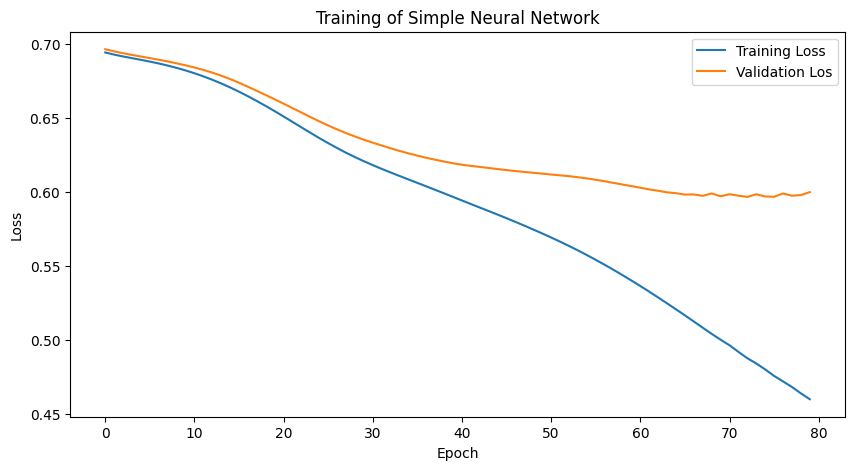

In [15]:
import matplotlib.pyplot as plt

# Converting tensors to lists of scalars
visual_train_losses = [x.item() for x in total_train_losses]
visual_valid_losses = [x.item() for x in total_valid_losses]

# Plotting the values
plt.figure(figsize=(10, 5))
plt.plot(visual_train_losses, label='Training Loss')
plt.plot(visual_valid_losses, label='Validation Los')
plt.title('Training of Simple Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# SimpleNN on Test Data

In [16]:
# convert to tensor
X_test = torch.tensor(X_test, dtype=torch.float32)  
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)  # Convert to tensor and ensure correct shape
result = eval_model(nn_model, X_test, y_test, nn_loss_func, verbose=True)

Accuracy: 0.6951672862453532
ROC AUC Score: 0.694983305698399
Precision: 0.6948501152959262
Recall: 0.6812358703843255
F1 Score: 0.6879756468797564
Matthews Correlation Coefficient: 0.39014050600015304
Specificity (Negative Prediction Accuracy): 0.7087307410124725
